# 머신러닝이 풀고자 하는 문제

- 일차함수는 기울기 $w$, y-절편 $b$으로 이루어진 함수입니다.
  - $f(x)=wx+b$
- 예를 들어 기울기가 $w=1$, y-절편이 $b=2$인 함수에 $x=10$을 입력하면 출력은 $f(10)=12$입니다.
  - $f(10)=1 \times 10 + 2 = 12$
- 이처럼 함수에 입력을 넣어 그 결과를 계산하는 문제는 매우 쉬운 일입니다.
- 어떻게 보면 함수 $f(x)$는 입력 $x$를 이용해 원하는 결과를 얻는 알고리즘입니다.
- 머신 러닝이 해결하고자 하는 문제는 이 상황과는 반대로, 입력 $10$과 출력 $12$만 있을 때 "이 입력과 출력을 얻어낸 함수(즉 알고리즘) $f(x)$는 도대체 무엇인가?"를 답하는 것입니다.
  - 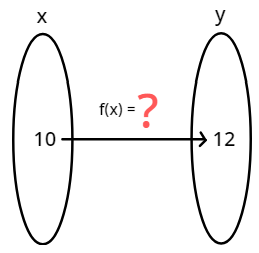
- 여기서 함수 $f(x)$의 형태가 $wx+b$라고 한 것은 단순히 우리가 세운 가설입니다.
- $f(x)$는 사실 이차함수일 수도 있고 삼차함수일 수도 있고 다른 무언가일 수도 있습니다.
- 다만, 가설을 세움으로 인해서 "$f(x)$는 무엇인가?" 라는 질문은 "$f(x)$가 일차함수라고 해보자. 그렇다면 $w$와 $b$는 무엇인가?"라는 질문으로 바뀌게 됩니다.
  - 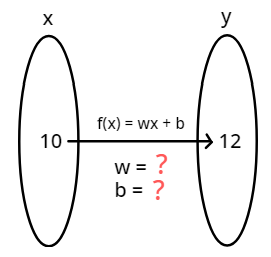
- 머신러닝은 이 문제에서 구하고자 하는 $w$, $b$를 학습 가능한 파라미터(learnable parameter)라고 부릅니다.
- 또한 입력 데이터 $10$를 입력 샘플(input sample)이라고 부릅니다. 출력 데이터 $12$는 타겟(target)이라고 부릅니다.
- 다음 소스코드는, 파이토치 라이브러리를 사용해 위의 문제를 해결하는 프로그램입니다:

epoch 1 - output = 11.0, loss = 1.0
epoch 2 - output = 11.20199966430664, loss = 0.6368045210838318
epoch 3 - output = 11.36319637298584, loss = 0.40551885962486267
epoch 4 - output = 11.491829872131348, loss = 0.2582368850708008
epoch 5 - output = 11.594480514526367, loss = 0.16444605588912964
epoch 6 - output = 11.676395416259766, loss = 0.10471992939710617
epoch 7 - output = 11.741764068603516, loss = 0.06668579578399658
epoch 8 - output = 11.793927192687988, loss = 0.04246600344777107
epoch 9 - output = 11.835554122924805, loss = 0.02704244665801525
epoch 10 - output = 11.86877155303955, loss = 0.017220905050635338
epoch 11 - output = 11.895279884338379, loss = 0.010966302827000618
epoch 12 - output = 11.91643238067627, loss = 0.006983547005802393
epoch 13 - output = 11.933313369750977, loss = 0.00444710673764348
epoch 14 - output = 11.946783065795898, loss = 0.0028320420533418655
epoch 15 - output = 11.95753288269043, loss = 0.0018034561071544886
epoch 16 - output = 11.96611118316

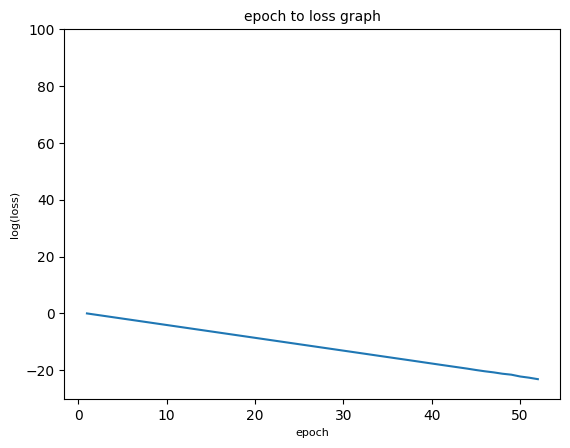

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim

class Single(nn.Module): # 나만의 모델을 정의하겠습니다
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.tensor([1.])) # w를 일단 1로 정하겠습니다. 나중에 학습하면서 서서히 고치겠습니다.
        self.bias = nn.Parameter(torch.tensor([1.])) # b를 일단 1로 정합니다. 나중에 학습하면서 서서히 고치겠습니다.
    def forward(self, input):
        return self.weight * input + self.bias # 내 모델은 문제의 해답이 일차 함수라는 가설입니다. 기울기는 weight, y절편은 bias 입니다.

model = Single()
input = torch.tensor([10.0]) # 알려진 입력입니다.
target = torch.tensor([12.0]) # 알려진 출력입니다.
criterion = nn.MSELoss() # 오류는 평균 제곱으로 측정하겠습니다.
learning_rate = 0.001 # 학습률입니다.
optimizer = optim.SGD(model.parameters(), lr=learning_rate) # 스토캐스틱 그래디언트 디센트 전략을 사용해 학습하겠습니다.
max_epoch = 1000 # 1000번 학습해도 안 되면 포기하겠습니다.
losses = [] # 시기 별 로스를 기록하겠습니다.
for i in range(max_epoch):
    predict = model.forward(10) # 현재 모델이 예측을 합니다.
    optimizer.zero_grad() # 이전 루프에서 계산했던 편미분을 모두 초기화 하겠습니다.
    loss = criterion(predict, target) # 예측과 타겟 사이의 오류를 검사합니다
    print(f"epoch {i+1} - output = {predict.item()}, loss = {loss.item()}") # 몇 번째 학습인지 표시합니다.
    losses.append(loss.item()) # 시기 별 로스를 기록하겠습니다.
    if loss.item() < 1.e-10: # 오차가 엄청 작으면 그냥 학습을 그만두겠습니다
        break
    else: # 예측과 타겟에 오류가 있었다면
        loss.backward() # 파라미터들에게 오류를 전파하고, 파라미터에 대한 오류의 편미분을 계산합니다.
        optimizer.step() # 스토캐스틱 그래디언트 디센트 전략을 통해 계산한 편미분을 참고하여 파라미터를 조절하겠습니다.
print(model)

import matplotlib.pyplot as plt
import math
x = range(1, i+2)
y = [math.log(loss) for loss in losses]
plt.gca().set_ylim(-30, 100)
plt.title('epoch to loss graph', fontsize=10)
plt.xlabel('epoch', fontsize=8)
plt.ylabel('log(loss)', fontsize=8)
plt.plot(x, y)
plt.show()

## 학습률(learning rate)의 선택

- `learning_rate` 변수의 값을 바꾸어가며 실행하며 학습을 시켜보면 보통 결과는 세 가지 정도의 현상이 보입니다.
  1. 학습률이 너무 낮아서 정답 근처에서 정체합니다. (`learning_rate = 0.001`)
  2. 학습률이 적당해서 어느 정도에서 학습이 끝납니다. (`learning_rate = 0.005`)
  3. 학습률이 너무 커서 오히려 정답에서 멀어집니다. (`learning_rate = 0.01`)
- 각각의 경우 출력이 어떻게 나오는 지 살펴보겠습니다.

### 학습률이 너무 낮은 경우

- `learning_rate = 0.0001`로 실행한 결과 다음 출력을 얻었습니다.
  > epoch 24 - output = 11.374594688415527, loss = 0.39113181829452515  
  > epoch 25 - output = 11.387228965759277, loss = 0.3754883408546448  
  > ...  
  > epoch 998 - output = 11.999970436096191, loss = 8.74024408403784e-10  
  > epoch 999 - output = 11.999970436096191, loss = 8.74024408403784e-10  
  > epoch 1000 - output = 11.999970436096191, loss = 8.74024408403784e-10  
  > 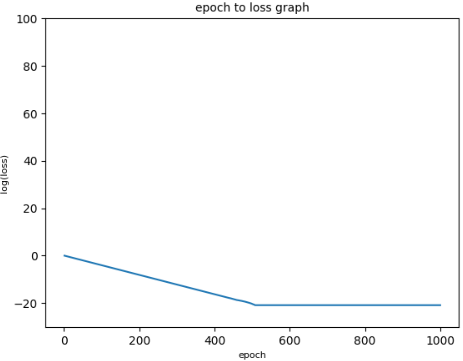
- 학습은 성공하여서, 타겟과 매우 가까운 에측을 내어 놓았습니다.
- 하지만 500차 시기 근처를 살펴보면, 시기가 반복되더라도 더 이상 로스나 파라미터가 변하지 않는 것을 알 수 있습니다.
- 이는 파라미터의 수정량이 지나치게 정밀해서 컴퓨터가 나타낼 수 있는 정밀도를 넘어선 경우입니다.

In [57]:
x = 2.0
y = 0.1e-14
z = 0.1e-15
print("x : ", x)
print("y : ", y)
print("z : ", z)
print("x + y = ", x + y) # 좋아요, 이정도는 할 수 있습니다.
print("x + z = ", x + z) # 이런! 그렇게 까지 정밀한 계산은 못 합니다.


x :  2.0
y :  1e-15
z :  1e-16
x + y =  2.000000000000001
x + z =  2.0


- 만약 학습을 반복하더라도, 더 이상 파라미터에 변화가 없다면 더 이상 시기를 반복할 이유가 없으므로, 시간을 낭비한 것입니다.



### 학습률이 적당한 경우

- `learnin_rate = 0.005`로 실행한 결과 다음 출력을 얻었습니다.
  >  epoch 1 - output = 11.0, loss = 1.0  
  >  epoch 2 - output = 11.20199966430664, loss = 0.6368045210838318  
  >  epoch 3 - output = 11.36319637298584, loss = 0.40551885962486267  
  >  ...  
  >  epoch 50 - output = 11.999984741210938, loss = 2.3283064365386963e-10  
  >  epoch 51 - output = 11.999987602233887, loss = 1.5370460459962487e-10  
  >  epoch 52 - output = 11.999990463256836, loss = 9.094947017729282e-11  
  >  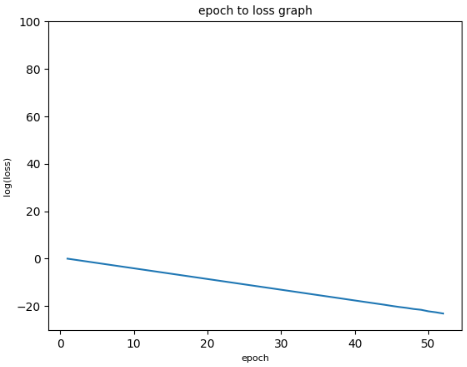  
- 학습률이 적당한 경우 학습률이 낮을 때 보다 더 적은 52 시기에서 기준을 충족하여 학습을 마쳤음을 알 수 있습니다.

### 학습률이 너무 높은 경우

- `learning_rate = 0.01`로 실행한 결과 다음 출력을 얻었습니다.
  > epoch 1 - output = 11.0, loss = 1.0  
  > epoch 2 - output = 13.020000457763672, loss = 1.0404009819030762  
  > epoch 3 - output = 10.959599494934082, loss = 1.0824332237243652  
  > epoch 4 - output = 13.06120777130127, loss = 1.1261619329452515  
  > epoch 5 - output = 10.91756820678711, loss = 1.1716586351394653  
  > epoch 6 - output = 13.104080200195312, loss = 1.218993067741394  
  > ...  
  > epoch 998 - output = 375277088.0, loss = 1.4083289675884134e+17  
  > epoch 999 - output = -382782592.0, loss = 1.4652251724526387e+17  
  > epoch 1000 - output = 390438240.0, loss = 1.524420129713029e+17  
  > 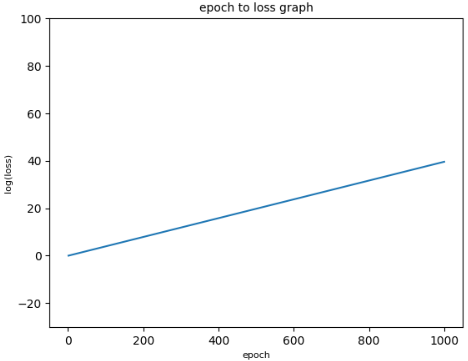
- 학습률이 지나치게 높은 경우, 행동을 고치려고 한 결과 오히려 로스가 더 커지게 되는 것을 알 수 있습니다.
- 그런 경우 학습을 거치면 거칠수록 정답에서 멀어지기 때문에 학습은 실패합니다.

## torch.nn.Linear

- 우리가 방금 구현했던 `Single`은 사실 `torch.nn.Linear()`의 특수한 경우입니다.
- `Single` 대신 `torch.nn.Linear(1,1)`을 하면 $w$와 $b$가 0차원 텐서인 선형 모델이 됩니다.
- 다음 코드는 $w$와 $b$의 초기값이 랜덤하다는 것을 제외하고 위의 소스코드와 거의 같습니다.

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(1, 1)
input = torch.tensor([10.0]) # 알려진 입력입니다.
target = torch.tensor([12.0]) # 알려진 출력입니다.
criterion = nn.MSELoss() # 오류는 평균 제곱으로 측정하겠습니다.
learning_rate = 0.001 # 학습률입니다.
optimizer = optim.SGD(model.parameters(), lr=learning_rate) # 스토캐스틱 그래디언트 디센트 전략을 사용해 학습하겠습니다.
max_epoch = 1000 # 10000번 학습해도 안 되면 포기하겠습니다.
for i in range(max_epoch):
    predict = model.forward(torch.tensor([10.])) # 현재 모델이 예측을 합니다.
    optimizer.zero_grad() # 이전 루프에서 계산했던 편미분을 모두 초기화 하겠습니다.
    loss = criterion(predict, target) # 예측과 타겟 사이의 오류를 검사합니다
    print(f"epoch {i+1} - output = {predict.item()}, loss = {loss.item()}") # 몇 번째 학습인지 표시합니다.
    if loss.item() < 1.e-10: # 오차가 엄청 작으면 그냥 학습을 그만두겠습니다
        break
    else: # 예측과 타겟에 오류가 있었다면
        loss.backward() # 파라미터들에게 오류를 전파하고, 파라미터에 대한 오류의 편미분을 계산합니다.
        optimizer.step() # 스토캐스틱 그래디언트 디센트 전략을 통해 계산한 편미분을 참고하여 파라미터를 조절하겠습니다.
print(model)


epoch 1 - output = -7.435960292816162, loss = 377.7565612792969
epoch 2 - output = -3.5098962783813477, loss = 240.556884765625
epoch 3 - output = -0.37689685821533203, loss = 153.1875762939453
epoch 4 - output = 2.1232364177703857, loss = 97.55045318603516
epoch 5 - output = 4.118342876434326, loss = 62.12051773071289
epoch 6 - output = 5.710437774658203, loss = 39.55859375
epoch 7 - output = 6.980929374694824, loss = 25.191070556640625
epoch 8 - output = 7.994781970977783, loss = 16.041770935058594
epoch 9 - output = 8.80383586883545, loss = 10.215465545654297
epoch 10 - output = 9.449460983276367, loss = 6.505249500274658
epoch 11 - output = 9.964669227600098, loss = 4.142571449279785
epoch 12 - output = 10.375805854797363, loss = 2.6380066871643066
epoch 13 - output = 10.703893661499023, loss = 1.679891586303711
epoch 14 - output = 10.965707778930664, loss = 1.0697604417800903
epoch 15 - output = 11.17463493347168, loss = 0.6812275052070618
epoch 16 - output = 11.341357231140137, l